
*In this notebook, we combine our 4 datasets (m2,m5,m8,m11), and we remove pings with horizontal_accuracy <= 50. This removes 6.70% of pings.*

# Setup

## Import libraries

In [2]:
import pandas as pd

## Load Datasets

In [6]:
m2_data = pd.read_csv("../datasets/m2/m2.csv")
m5_data = pd.read_csv("../datasets/m5/m5.csv")
m8_data = pd.read_csv("../datasets/m8/m8.csv")
m11_data = pd.read_csv("../datasets/m11/m11.csv")


## Inspect Datasets

In [7]:
# Function to inspect different aspects of the datasets
def inspect_dataset(dataset):
    print(dataset.shape)
    print(dataset.columns)
    print(dataset["caid"].nunique())

In [8]:
inspect_dataset(m2_data)

(3533537, 8)
Index(['caid', 'zipcode', 'utc_timestamp', 'latitude', 'longitude',
       'horizontal_accuracy', 'region', 'ping_near_replicate_matches'],
      dtype='object')
9503


In [9]:
m2_data.head()

,caid,zipcode,utc_timestamp,latitude,longitude,horizontal_accuracy,region,ping_near_replicate_matches
0,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 05:33:33.000,33.95756,-118.37116,33.0,california,1
1,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 06:18:44.000,33.95456,-118.35538,5.0,california,1
2,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 05:12:58.000,33.95747,-118.37079,12.0,california,1
3,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 05:33:38.000,33.95754,-118.37114,33.0,california,1
4,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 06:42:13.000,33.95672,-118.35954,5.0,california,1


In [10]:
inspect_dataset(m5_data)

(2699911, 8)
Index(['caid', 'zipcode', 'utc_timestamp', 'latitude', 'longitude',
       'horizontal_accuracy', 'region', 'ping_near_replicate_matches'],
      dtype='object')
9503


In [11]:
inspect_dataset(m8_data)

(2696950, 8)
Index(['caid', 'zipcode', 'utc_timestamp', 'latitude', 'longitude',
       'horizontal_accuracy', 'region', 'ping_near_replicate_matches'],
      dtype='object')
9503


In [12]:
inspect_dataset(m11_data)

(2144457, 8)
Index(['caid', 'zipcode', 'utc_timestamp', 'latitude', 'longitude',
       'horizontal_accuracy', 'region', 'ping_near_replicate_matches'],
      dtype='object')
9503


# Inspect horizontal accuracy

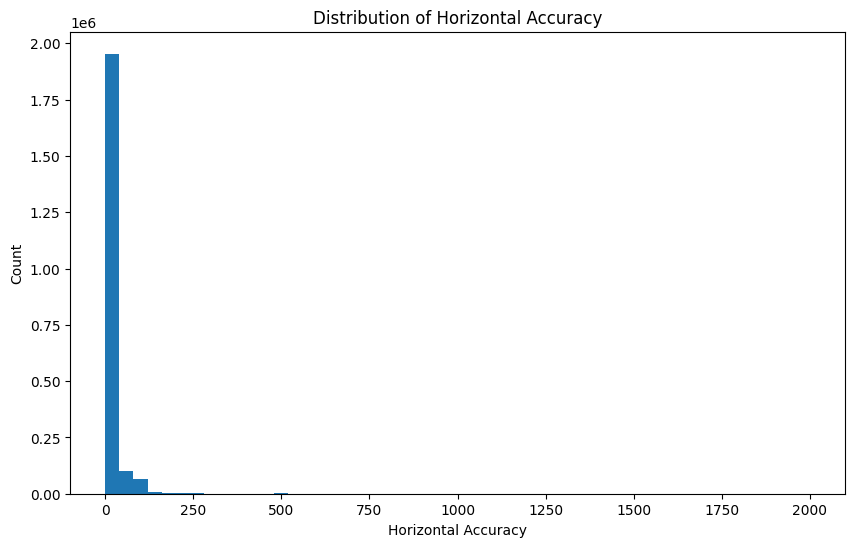

In [13]:
# First, make sure we have the required libraries
import matplotlib.pyplot as plt

# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(m11_data['horizontal_accuracy'], bins=50)
plt.title('Distribution of Horizontal Accuracy')
plt.xlabel('Horizontal Accuracy')
plt.ylabel('Count')
plt.show()

# Combine datasets

In [14]:
# Create a copy of each dataset and add a quarter column
m2_data['quarter'] = '2'
m5_data['quarter'] = '5'
m8_data['quarter'] = '8'
m11_data['quarter'] = '11'

# Combine all datasets
mega_data = pd.concat([m2_data, m5_data, m8_data, m11_data], ignore_index=True)

# Display the combined dataset info
print("Shape of combined dataset:", mega_data.shape)
print("\nSample of combined data:")
mega_data.head()

Shape of combined dataset: (11074855, 9)

Sample of combined data:


,caid,zipcode,utc_timestamp,latitude,longitude,horizontal_accuracy,region,ping_near_replicate_matches,quarter
0,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 05:33:33.000,33.95756,-118.37116,33.0,california,1,2
1,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 06:18:44.000,33.95456,-118.35538,5.0,california,1,2
2,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 05:12:58.000,33.95747,-118.37079,12.0,california,1,2
3,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 05:33:38.000,33.95754,-118.37114,33.0,california,1,2
4,3924b2d36e1b036021dd5cc9ccabf33e20ba55e0f3a531...,90301,2024-02-14 06:42:13.000,33.95672,-118.35954,5.0,california,1,2


# Clean dataset (horizontal accuracy)

In [17]:
import pandas as pd

# Original dataset size
initial_row_count = len(mega_data)

# Remove only the imprecise pings (horizontal_accuracy > 50)
clean_mega_data = mega_data[mega_data['horizontal_accuracy'] <= 50]

# Filtered dataset size
clean_row_count = len(clean_mega_data)

# Calculate the percentage of rows removed
percentage_removed = ((initial_row_count - clean_row_count) / initial_row_count) * 100

# Get the list of unique mobile devices remaining
unique_mobiles_left = clean_mega_data['caid'].unique()

# Display results
print(f"Initial dataset size: {initial_row_count}")
print(f"Filtered dataset size: {clean_row_count}")
print(f"Percentage of rows removed: {percentage_removed:.2f}%")
print(f"Number of unique mobiles left: {len(unique_mobiles_left)}")




Initial dataset size: 11074855
Filtered dataset size: 10332575
Percentage of rows removed: 6.70%
Number of unique mobiles left: 9503


## Convert clean dataset to csv

In [ ]:
clean_mega_data.to_csv("clean_mega_data.csv")